
# Predicción del Estado Operativo de Bombas de Agua en Tanzania

**Autor:** Nelson Ponce Luna
**Fecha:** 08-05-2025
**Módulo:** Machine Learning con Python (Máster :ntic UCM)

## 1. Propósito

Este notebook documenta el proceso desarrollado para participar en la competición de DrivenData ["Pump it Up: Data Mining the Water Table"](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/) y cumplir con la práctica de evaluación del módulo. El desafío consiste en predecir la condición operativa de distintas bombas de agua distribuidas por Tanzania.

## 2. Objetivo

El objetivo principal es construir y evaluar un modelo de clasificación supervisada capaz de predecir con la mayor precisión posible si una bomba de agua está en uno de los siguientes estados:
* `functional`: Operativa.
* `non functional`: No operativa.
* `functional needs repair`: Operativa, pero requiere reparaciones.

Utilizaremos un conjunto de datos proporcionado por la competición que incluye diversas características sobre las bombas (geográficas, técnicas, de gestión, etc.).

## 3. Metodología

El desarrollo seguirá los pasos estándar de un proyecto de Machine Learning:
1.  **Carga e Inspección Inicial:** Cargar los datos proporcionados (entrenamiento y prueba).
2.  **Análisis Exploratorio de Datos (EDA):** Entender las características de los datos, identificar patrones, valores faltantes y desafíos.
3.  **Preprocesamiento de Datos:** Limpiar y transformar los datos para prepararlos para el modelado (imputación de nulos, tratamiento de fechas, codificación de variables categóricas, escalado de variables numéricas).
4.  **Modelado:** Entrenar uno o varios algoritmos de clasificación (empezando con Random Forest).
5.  **Evaluación:** Medir el rendimiento del modelo utilizando métricas apropiadas en un conjunto de validación.
6.  **Generación de Predicciones:** Utilizar el modelo final para predecir el estado de las bombas en el conjunto de prueba y preparar el archivo para la sumisión al concurso.

---


## Configuración Inicial: Importación de Librerías

En esta sección, importamos las librerías de Python necesarias para el análisis y modelado. Las principales herramientas que utilizaremos son:
* **Pandas:** Para cargar, manipular y analizar nuestros datos, que vienen en formato tabular.
* **NumPy:** Para operaciones numéricas eficientes.
* **Matplotlib y Seaborn:** Para crear visualizaciones (gráficos) que nos ayuden a entender los datos.
* **Scikit-learn (sklearn):** La librería fundamental para Machine Learning en Python. De aquí importaremos:
    * `StandardScaler`: Para escalar nuestras variables numéricas.
    * `RandomForestClassifier`: El primer modelo de clasificación que vamos a entrenar.
    * (Posteriormente se añadirán otras herramientas de `sklearn` para división de datos, métricas, etc.)

In [70]:
#Importamos librerías

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Carga de Datos

Cargamos los conjuntos de datos proporcionados por la competición de DrivenData. Los datos se dividen en:

* **Valores de Entrenamiento (`training_set_values.csv`):** Contiene las características (variables independientes) de un conjunto de bombas de agua. Utilizaremos estos datos para entrenar nuestro modelo. Se carga en el DataFrame `training_set_values_df`.
* **Etiquetas de Entrenamiento (`training_set_labels.csv`):** Contiene el estado operativo (`status_group` - la variable objetivo) para cada bomba en el conjunto de entrenamiento. Se carga en el DataFrame `training_set_labels_df`.
* **Valores de Prueba (`test_set_values.csv`):** Contiene las características de un conjunto diferente de bombas para las cuales debemos predecir su estado operativo. Se carga en el DataFrame `test_set_values_df`.


In [71]:
#Cargamos CSVs

training_set_values_df = pd.read_csv('/content/drive/MyDrive/UCM/machinelearning/training_set_values.csv')
training_set_labels_df = pd.read_csv('/content/drive/MyDrive/UCM/machinelearning/training_set_labels.csv')
test_set_values_df = pd.read_csv('/content/drive/MyDrive/UCM/machinelearning/test_set_values.csv')
sumb_format_df = pd.read_csv('/content/drive/MyDrive/UCM/machinelearning/SubmissionFormat.csv')

print('Archivos CSV cargados!')

Archivos CSV cargados!


In [72]:
#Conocer los datos - Training Set Values

training_set_values_df.head(25)



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [73]:
training_set_values_df.describe()



,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [74]:
training_set_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [75]:
# Conocer datos - Test Set Values

test_set_values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [76]:
test_set_values_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [77]:
# Conocer datos - Training Set Label

training_set_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


## Creación del Conjunto de Datos de Entrenamiento Completo

Los datos de entrenamiento están divididos en dos archivos: uno con las características (`training_set_values_df`) y otro con la etiqueta objetivo (`training_set_labels_df`). Para poder entrenar el modelo, necesitamos combinarlos en un único DataFrame.

Realizaremos una unión (`merge`) utilizando la columna `id`, que actúa como identificador único para cada bomba de agua y está presente en ambos DataFrames. Usaremos una unión de tipo 'inner' para asegurarnos de que solo incluimos las bombas para las que tenemos tanto las características como la etiqueta de estado. El resultado será nuestro DataFrame principal de entrenamiento, `train_df`.

In [78]:
train_df = pd.merge(training_set_values_df, training_set_labels_df, on='id')
train_df.head()

#ya tenemos el set al completo :D

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# EDA

In [79]:
#EDA --> train_df
#Columnas con valores númericos
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


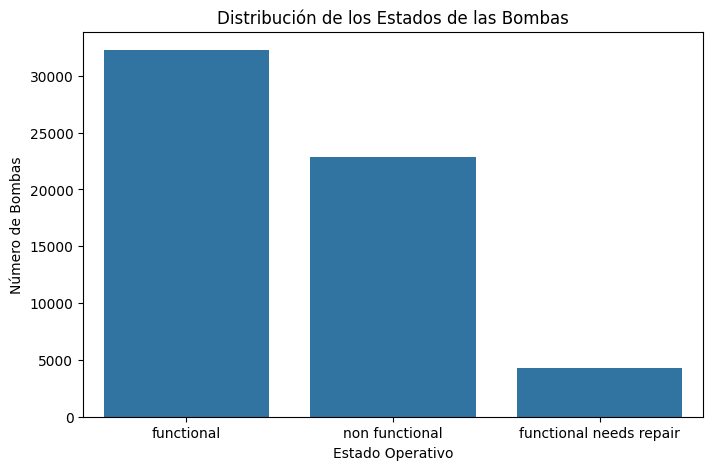

In [80]:
#Columnas con valores de tipo object+
conteo_status = train_df['status_group'].value_counts()
print(conteo_status)

#graficamos para visualizar desviación en base al estado de la bomba

plt.figure(figsize=(8,5))
sns.countplot(x='status_group', data=train_df)
plt.title('Distribución de los Estados de las Bombas')
plt.xlabel('Estado Operativo')
plt.ylabel('Número de Bombas')
plt.show()

In [81]:
#Chequeamos los missing

train_df.isnull().sum() #vemos su total pero no el peso sobre la cantidad general de datos

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [82]:
#Peso de los nulls por variables
(train_df.isnull().sum()/len(train_df))*100

,0
id,0.000000
amount_tsh,0.000000
date_recorded,0.000000
funder,6.122896
gps_height,0.000000
installer,6.153199
longitude,0.000000
latitude,0.000000
wpt_name,0.003367
num_private,0.000000


In [83]:
#Chequeamos valores únicos

print("\nCardinalidad de las columnas (número de valores únicos):")

columnas_categoricas = train_df.select_dtypes(include=['object', 'category']).columns

for col in columnas_categoricas:
    print(f"Columna '{col}': {train_df[col].nunique()} valores únicos")




Cardinalidad de las columnas (número de valores únicos):
Columna 'date_recorded': 356 valores únicos
Columna 'funder': 1896 valores únicos
Columna 'installer': 2145 valores únicos
Columna 'wpt_name': 37399 valores únicos
Columna 'basin': 9 valores únicos
Columna 'subvillage': 19287 valores únicos
Columna 'region': 21 valores únicos
Columna 'lga': 125 valores únicos
Columna 'ward': 2092 valores únicos
Columna 'public_meeting': 2 valores únicos
Columna 'recorded_by': 1 valores únicos
Columna 'scheme_management': 11 valores únicos
Columna 'scheme_name': 2695 valores únicos
Columna 'permit': 2 valores únicos
Columna 'extraction_type': 18 valores únicos
Columna 'extraction_type_group': 13 valores únicos
Columna 'extraction_type_class': 7 valores únicos
Columna 'management': 12 valores únicos
Columna 'management_group': 5 valores únicos
Columna 'payment': 7 valores únicos
Columna 'payment_type': 7 valores únicos
Columna 'water_quality': 8 valores únicos
Columna 'quality_group': 6 valores ún

In [84]:
train_df.describe(include=['object'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [85]:
#Quitar waterpump name y recorded by

columnas_a_eliminar = ['recorded_by', 'wpt_name']

# Eliminar col de train_df
train_df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# idem de test_set_value
test_set_values_df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# chequeamos
print("Columnas restantes en train_df:", train_df.columns)
print("Dimensiones de train_df:", train_df.shape)
print("\nColumnas restantes en test_values_df:", test_set_values_df.columns)
print("Dimensiones de test_values_df:", test_set_values_df.shape)

Columnas restantes en train_df: Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')
Dimensiones de train_df: (59400, 39)

Columnas restantes en test_values_df: Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'war

## Análisis Exploratorio de Datos

Tras limpiar duplicados, iniciamos el Análisis Exploratorio de Datos (EDA) para comprender mejor las características de nuestro conjunto de entrenamiento (`train_df`). El objetivo del EDA es descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones sobre los datos.

### Estadísticas Descriptivas

Comenzamos obteniendo estadísticas descriptivas básicas para tener una visión general de las variables numéricas y categóricas.

* **Variables Numéricas:** Analizaremos la tendencia central (media, mediana), dispersión (desviación estándar, mínimo, máximo, percentiles) y el conteo de valores no nulos.
* **Variables Categóricas:** Examinaremos el número de categorías únicas, la categoría más frecuente y su frecuencia.

In [86]:
columnas_categoricas_con_nulos = ['funder', 'installer', 'public_meeting', 'permit']

for col in columnas_categoricas_con_nulos:
    if col in train_df.columns:
        moda = train_df[col].mode()[0]

        train_df[col].fillna(moda, inplace=True)

        if col in test_set_values_df.columns:
            test_set_values_df[col].fillna(moda, inplace=True)

        print(f"Columna categórica '{col}': Nulos imputados con la moda '{moda}'.")

Columna categórica 'funder': Nulos imputados con la moda 'Government Of Tanzania'.
Columna categórica 'installer': Nulos imputados con la moda 'DWE'.
Columna categórica 'public_meeting': Nulos imputados con la moda 'True'.
Columna categórica 'permit': Nulos imputados con la moda 'True'.


<ipython-input-86-ef38f923f3a1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(moda, inplace=True)
<ipython-input-86-ef38f923f3a1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [87]:
columnas_numericas_con_nulos = ['gps_height', 'population', 'amount_tsh']

for col in columnas_numericas_con_nulos:
    if col in train_df.columns:
        mediana = train_df[col].median()

        train_df[col].fillna(mediana, inplace=True)

        if col in test_set_values_df.columns:
            test_set_values_df[col].fillna(mediana, inplace=True)

        print(f"Columna numérica '{col}': Nulos imputados con la mediana '{mediana}'.")

Columna numérica 'gps_height': Nulos imputados con la mediana '369.0'.
Columna numérica 'population': Nulos imputados con la mediana '25.0'.
Columna numérica 'amount_tsh': Nulos imputados con la mediana '0.0'.


<ipython-input-87-4989627e4ab5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mediana, inplace=True)
<ipython-input-87-4989627e4ab5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [88]:
print("\nNulos restantes en train_df después de imputación:")
print(train_df.isnull().sum().sum())

print("\nNulos restantes en test_values_df después de imputación:")
print(test_set_values_df.isnull().sum().sum())


Nulos restantes en train_df después de imputación:
33059

Nulos restantes en test_values_df después de imputación:
8310


In [89]:
print("Nulos restantes en train_df (columnas específicas):")
nulos_train_restantes = train_df.isnull().sum()
print(nulos_train_restantes[nulos_train_restantes > 0].sort_values(ascending=False))

print("\nNulos restantes en test_values_df (columnas específicas):")
nulos_test_restantes = test_set_values_df.isnull().sum()
print(nulos_test_restantes[nulos_test_restantes > 0].sort_values(ascending=False))

Nulos restantes en train_df (columnas específicas):
scheme_name          28810
scheme_management     3878
subvillage             371
dtype: int64

Nulos restantes en test_values_df (columnas específicas):
scheme_name          7242
scheme_management     969
subvillage             99
dtype: int64


In [90]:
train_df['scheme_name'].fillna('Desconocido_Scheme', inplace=True)
test_set_values_df['scheme_name'].fillna('Desconocido_Scheme', inplace=True)

<ipython-input-90-f6ed3b3338c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['scheme_name'].fillna('Desconocido_Scheme', inplace=True)
<ipython-input-90-f6ed3b3338c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [91]:
moda_sm = train_df['scheme_management'].mode()[0]
train_df['scheme_management'].fillna(moda_sm, inplace=True)
test_set_values_df['scheme_management'].fillna(moda_sm, inplace=True)

<ipython-input-91-44c0015327b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['scheme_management'].fillna(moda_sm, inplace=True)
<ipython-input-91-44c0015327b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [92]:
moda_sv = train_df['subvillage'].mode()[0]
train_df['subvillage'].fillna(moda_sv, inplace=True)
if 'subvillage' in test_set_values_df.columns:
    test_set_values_df['subvillage'].fillna(moda_sv, inplace=True)

<ipython-input-92-08d2ef130be9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['subvillage'].fillna(moda_sv, inplace=True)
<ipython-input-92-08d2ef130be9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [93]:
print("Nulos FINALMENTE restantes en train_df:", train_df.isnull().sum().sum())
print("Nulos FINALMENTE restantes en test_values_df:", test_set_values_df.isnull().sum().sum())

Nulos FINALMENTE restantes en train_df: 0
Nulos FINALMENTE restantes en test_values_df: 0


In [94]:
nulos_train_finales = train_df.isnull().sum()
print("Columnas en train_df con nulos restantes:")
print(nulos_train_finales[nulos_train_finales > 0])

Columnas en train_df con nulos restantes:
Series([], dtype: int64)


In [95]:
columna_con_2_nulos = 'wpt_name'

# Eliminar la columna de train_df
if columna_con_2_nulos in train_df.columns:
    train_df.drop(columns=[columna_con_2_nulos], inplace=True)
    print(f"Columna '{columna_con_2_nulos}' eliminada de train_df.")

# Eliminar la columna de test_values_df
if columna_con_2_nulos in test_set_values_df.columns:
    test_set_values_df.drop(columns=[columna_con_2_nulos], inplace=True)
    print(f"Columna '{columna_con_2_nulos}' eliminada de test_values_df.")

#Check :)
print("\n¿Quedan nulos en train_df?", train_df.isnull().sum().sum())
print("¿Quedan nulos en test_values_df?", test_set_values_df.isnull().sum().sum())


¿Quedan nulos en train_df? 0
¿Quedan nulos en test_values_df? 0


In [96]:
###Pásamos de date de type string a date --pd.datetime()


train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
test_set_values_df['date_recorded'] = pd.to_datetime(test_set_values_df['date_recorded'])

#Extraemos time

train_df['year_recorded'] = train_df['date_recorded'].dt.year
train_df['month_recorded'] = train_df['date_recorded'].dt.month
train_df['day_recorded'] = train_df['date_recorded'].dt.day
train_df['week_day_recorded'] = train_df['date_recorded'].dt.dayofweek
train_df['day_of_year'] = train_df['date_recorded'].dt.dayofyear

test_set_values_df['year_recorded'] = test_set_values_df['date_recorded'].dt.year
test_set_values_df['month_recorded'] = test_set_values_df['date_recorded'].dt.month
test_set_values_df['day_recorded'] = test_set_values_df['date_recorded'].dt.day
test_set_values_df['week_day_recorded'] = test_set_values_df['date_recorded'].dt.dayofweek
test_set_values_df['day_of_year'] = test_set_values_df['date_recorded'].dt.dayofyear

#Eliminamos la columna original ya que esta contiene un string, y lo hemos cambiado por un formato date
train_df.drop(columns=['date_recorded'], inplace=True, errors='ignore')
test_set_values_df.drop(columns=['date_recorded'], inplace=True, errors='ignore')

In [97]:
# Calculamos la mediana de construction_year
mediana_construction_year = train_df['construction_year'].median()

# Realizar en train_df
train_df['construction_year'].fillna(mediana_construction_year, inplace=True)

# Ralizar en test_values_df (CON LA MISMA MEDIANA DEL TRAIN SET)
test_set_values_df['construction_year'].fillna(mediana_construction_year, inplace=True)

<ipython-input-97-146379ac33fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['construction_year'].fillna(mediana_construction_year, inplace=True)
<ipython-input-97-146379ac33fa>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [98]:
col_construction_year = 'construction_year'
col_year_recorded = 'year_recorded'

#  Reemplazar 0 con NaN en 'construction_year'
if col_construction_year in train_df.columns:
    train_df[col_construction_year] = train_df[col_construction_year].replace(0, np.nan)
if col_construction_year in test_set_values_df.columns:
    test_set_values_df[col_construction_year] = test_set_values_df[col_construction_year].replace(0, np.nan)

# Calcula mediana luego de tratar valores = 0
mediana_construction_year = np.nan # Valor por defecto si no se puede calcular
if col_construction_year in train_df.columns and train_df[col_construction_year].notnull().any():
    mediana_construction_year = train_df[col_construction_year].median()
else:
    print(f"Advertencia: No se pudo calcular la mediana para '{col_construction_year}' en train_df. Usando NaN por defecto para imputar.")

if col_construction_year in train_df.columns:
    train_df[col_construction_year].fillna(mediana_construction_year, inplace=True)
if col_construction_year in test_set_values_df.columns:
    test_set_values_df[col_construction_year].fillna(mediana_construction_year, inplace=True)


# En train_df
if col_year_recorded in train_df.columns and col_construction_year in train_df.columns:
    if train_df[col_construction_year].isnull().sum() == 0 and train_df[col_year_recorded].isnull().sum() == 0 : #Doble check
        train_df['edad_pozo'] = train_df[col_year_recorded] - train_df[col_construction_year]
    else:
        print(f"No se pudo crear 'edad_pozo' en train_df porque '{col_year_recorded}' o '{col_construction_year}' tienen nulos.")
else:
    print(f"Falta '{col_year_recorded}' o '{col_construction_year}' en train_df para crear 'edad_pozo'.")


# En test_set_values_df
if col_year_recorded in test_set_values_df.columns and col_construction_year in test_set_values_df.columns:
    if test_set_values_df[col_construction_year].isnull().sum() == 0 and test_set_values_df[col_year_recorded].isnull().sum() == 0 : #Doble check
        test_set_values_df['edad_pozo'] = test_set_values_df[col_year_recorded] - test_set_values_df[col_construction_year]
    else:
         print(f"No se pudo crear 'edad_pozo' en test_set_values_df porque '{col_year_recorded}' o '{col_construction_year}' tienen nulos.")
else:
    print(f"Falta '{col_year_recorded}' o '{col_construction_year}' en test_set_values_df para crear 'edad_pozo'.")


if 'edad_pozo' in train_df.columns:
    print("\nDescripción de 'edad_pozo' en train_df:")
    print(train_df['edad_pozo'].describe())
    print("Número de edades de pozo negativas en train_df:", (train_df['edad_pozo'] < 0).sum()) #Check si edad negativa ya que no posible

if 'edad_pozo' in test_set_values_df.columns:
    print("\nDescripción de 'edad_pozo' en test_set_values_df:")
    print(test_set_values_df['edad_pozo'].describe())
    print("Número de edades de pozo negativas en test_set_values_df:", (test_set_values_df['edad_pozo'] < 0).sum())
    test_set_values_df.loc[test_set_values_df['edad_pozo'] < 0, 'edad_pozo'] = 0


Descripción de 'edad_pozo' en train_df:
count    59400.000000
mean        13.996465
std         10.260706
min         -7.000000
25%          8.000000
50%         11.000000
75%         16.000000
max         53.000000
Name: edad_pozo, dtype: float64
Número de edades de pozo negativas en train_df: 9

Descripción de 'edad_pozo' en test_set_values_df:
count    14850.000000
mean        13.780269
std         10.076995
min         -7.000000
25%          8.000000
50%         11.000000
75%         16.000000
max         53.000000
Name: edad_pozo, dtype: float64
Número de edades de pozo negativas en test_set_values_df: 3


<ipython-input-98-87511a9dd927>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col_construction_year].fillna(mediana_construction_year, inplace=True)
<ipython-input-98-87511a9dd927>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [99]:
# Contar cuántos negativos hay antes de la corrección
if 'edad_pozo' in train_df.columns:
    print("Número de 'edad_pozo' negativas en train_df ANTES:", (train_df['edad_pozo'] < 0).sum())
    # Corregir en train_df
    train_df.loc[train_df['edad_pozo'] < 0, 'edad_pozo'] = 0
    print("Número de 'edad_pozo' negativas en train_df DESPUÉS:", (train_df['edad_pozo'] < 0).sum()) # Debería ser 0
    print("Mínimo de 'edad_pozo' en train_df DESPUÉS:", train_df['edad_pozo'].min()) # Debería ser >= 0

if 'edad_pozo' in test_set_values_df.columns:
    print("\nNúmero de 'edad_pozo' negativas en test_set_values_df ANTES:", (test_set_values_df['edad_pozo'] < 0).sum())
    # Corregir en test_set_values_df
    test_set_values_df.loc[test_set_values_df['edad_pozo'] < 0, 'edad_pozo'] = 0
    print("Número de 'edad_pozo' negativas en test_set_values_df DESPUÉS:", (test_set_values_df['edad_pozo'] < 0).sum()) # Debería ser 0
    print("Mínimo de 'edad_pozo' en test_set_values_df DESPUÉS:", test_set_values_df['edad_pozo'].min()) # Debería ser >= 0

Número de 'edad_pozo' negativas en train_df ANTES: 9
Número de 'edad_pozo' negativas en train_df DESPUÉS: 0
Mínimo de 'edad_pozo' en train_df DESPUÉS: 0.0

Número de 'edad_pozo' negativas en test_set_values_df ANTES: 0
Número de 'edad_pozo' negativas en test_set_values_df DESPUÉS: 0
Mínimo de 'edad_pozo' en test_set_values_df DESPUÉS: 0.0


In [100]:
columnas_categoricas = train_df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas (tipo object/category):", columnas_categoricas)

for col in columnas_categoricas: # Usa tu lista definitiva de categóricas
  print(f"Columna '{col}': {train_df[col].nunique()} valores únicos")

Columnas categóricas (tipo object/category): Index(['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'scheme_management', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')
Columna 'funder': 1896 valores únicos
Columna 'installer': 2145 valores únicos
Columna 'basin': 9 valores únicos
Columna 'subvillage': 19287 valores únicos
Columna 'region': 21 valores únicos
Columna 'lga': 125 valores únicos
Columna 'ward': 2092 valores únicos
Columna 'scheme_management': 11 valores únicos
Columna 'scheme_name': 2696 valores únicos
Columna 'extraction_type': 18 valores únicos
Columna 'extraction_type_group': 13 valores únicos
Columna 'extraction_type_class': 

In [101]:
#Eliminamos subvillage

train_df.drop(columns=['subvillage'], inplace=True, errors='ignore')
test_set_values_df.drop(columns=['subvillage'], inplace=True, errors='ignore')

#Aplicamos Frequency Encoding en caso de alta cardinalidad

columnas_freq_encoding = ['scheme_name', 'ward', 'funder', 'installer', 'lga']
for col in columnas_freq_encoding:
    if col in train_df.columns:
        freq_map = train_df[col].value_counts(normalize=True)

        # Map en train_df
        train_df[col + '_freq'] = train_df[col].map(freq_map)

        # Map en test_values_df (usando el mapeo de train_df)
        if col in test_set_values_df.columns:
            test_set_values_df[col + '_freq'] = test_set_values_df[col].map(freq_map)

            test_set_values_df[col + '_freq'].fillna(0, inplace=True)
    else:
        print(f"Advertencia: La columna '{col}' para Frequency Encoding no se encontró (quizás ya fue eliminada).")

columnas_ohe = [
    'basin', 'region', 'scheme_management', 'extraction_type',
    'extraction_type_group', 'extraction_type_class', 'management',
    'management_group', 'payment', 'payment_type', 'water_quality',
    'quality_group', 'quantity', 'quantity_group', 'source',
    'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'
]

train_cols_before_ohe = list(train_df.columns)
test_cols_before_ohe = list(test_set_values_df.columns)

# Aplicar One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=columnas_ohe, prefix=columnas_ohe, dummy_na=False)
test_values_df = pd.get_dummies(test_set_values_df, columns=columnas_ohe, prefix=columnas_ohe, dummy_na=False)

# ALINEAR COLUMNAS después de OHE
label_col = 'status_group'
train_features_cols = [col for col in train_df.columns if col != label_col]


for col in train_features_cols:
    if col not in test_values_df.columns:
        test_values_df[col] = 0 # Añadir columna faltante en test con ceros

# Columnas que están en test_values_df pero no deberían (extras creadas si alguna categoría solo existía en test)
for col in test_values_df.columns:
    if col not in train_features_cols:
        # Si la columna extra no es el id (que test_values_df sí tiene y train_df no directamente en las features)
        if col != 'id' and col in test_values_df.columns: # Doble check por si acaso
             test_values_df.drop(columns=[col], inplace=True, errors='ignore')


# Asegurar el mismo orden de columnas (basado en el de entrenamiento)
test_values_df = test_values_df.reindex(columns=train_features_cols, fill_value=0)


print("Dimensiones de train_df después de OHE:", train_df.shape)
print("Dimensiones de test_values_df después de OHE:", test_values_df.shape)
print("Nulos en train_df después de OHE:", train_df.isnull().sum().sum())
print("Nulos en test_values_df después de OHE:", test_values_df.isnull().sum().sum())

<ipython-input-101-88703f043610>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set_values_df[col + '_freq'].fillna(0, inplace=True)
<ipython-input-101-88703f043610>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Dimensiones de train_df después de OHE: (59400, 196)
Dimensiones de test_values_df después de OHE: (14850, 195)
Nulos en train_df después de OHE: 0
Nulos en test_values_df después de OHE: 0


In [102]:
#Listas a escalar
columnas_a_escalar = [
    'amount_tsh', 'gps_height', 'longitude', 'latitude',
    'num_private', 'population', 'edad_pozo', 'year_recorded',
    'day_of_year'
]

# Filtramos las columnas que realmente existen y son numéricas en train_df
columnas_escalables_train = []
for col in columnas_a_escalar:
    if col in train_df.columns and pd.api.types.is_numeric_dtype(train_df[col]):
        if train_df[col].nunique(dropna=False) > 2: # No escalamos si es binaria
            columnas_escalables_train.append(col)

if not columnas_escalables_train:
    print("No se identificaron columnas numéricas válidas para escalar en train_df.")
else:
    print(f"Columnas que se escalarán: {columnas_escalables_train}")

    scaler = StandardScaler()

    scaled_features_train = scaler.fit_transform(train_df[columnas_escalables_train])
    train_df_scaled_cols = pd.DataFrame(scaled_features_train, index=train_df.index, columns=columnas_escalables_train)

    for col in columnas_escalables_train:
        train_df[col] = train_df_scaled_cols[col]

    columnas_escalables_test = [col for col in columnas_escalables_train if col in test_values_df.columns]

    if set(columnas_escalables_train) != set(columnas_escalables_test):
        print("¡Advertencia! Las columnas escalables no coinciden exactamente entre train y test.")

    if columnas_escalables_test:
        scaled_features_test = scaler.transform(test_values_df[columnas_escalables_train])
        test_values_df_scaled_cols = pd.DataFrame(scaled_features_test, index=test_values_df.index, columns=columnas_escalables_train)

        for col in columnas_escalables_train:
            test_values_df[col] = test_values_df_scaled_cols[col]

        print("\nEscalado completado para train_df y test_values_df.")

    else:
        print("\nNo se escalaron columnas en test_values_df (lista vacía o columnas no válidas).")

Columnas que se escalarán: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'edad_pozo', 'year_recorded', 'day_of_year']

Escalado completado para train_df y test_values_df.


In [111]:
columnas_de_texto_problematicas = ['funder', 'installer', 'lga', 'ward', 'recorded_by', 'scheme_name']

col_recorded_by = 'recorded_by'
if col_recorded_by in train_df.columns:
    train_df.drop(columns=[col_recorded_by], inplace=True, errors='ignore')
    print(f"Columna '{col_recorded_by}' eliminada de train_df.")
if col_recorded_by in test_values_df.columns:
    test_values_df.drop(columns=[col_recorded_by], inplace=True, errors='ignore')
    print(f"Columna '{col_recorded_by}' eliminada de test_values_df.")

# Aplicamos Frequency Encoding al resto y eliminar originales
columnas_para_freq_encoding = ['funder', 'installer', 'lga', 'ward', 'scheme_name']

for col in columnas_para_freq_encoding:
    if col in train_df.columns: # check que la columna existe
        print(f"Aplicando Frequency Encoding y eliminando original para: '{col}'")
        freq_map = train_df[col].value_counts(normalize=True)

        train_df[col + '_freq'] = train_df[col].map(freq_map)
        # Eliminamos la columna original de texto de train_df
        train_df.drop(columns=[col], inplace=True, errors='ignore')

        if col in test_values_df.columns:
            test_values_df[col + '_freq'] = test_values_df[col].map(freq_map)
            test_values_df[col + '_freq'] = test_values_df[col + '_freq'].fillna(0) # Corregido
            # Eliminamos la columna original de texto de test_values_df
            test_values_df.drop(columns=[col], inplace=True, errors='ignore')
        print(f"   Original '{col}' eliminada, creada '{col}_freq'.")
    else:
        print(f"Advertencia: Columna '{col}' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).")

print("\n--- Verificación de tipos de datos en train_df DESPUÉS de Frequency Encoding y eliminaciones ---")
# Filtra para ver si queda alguna de las problemáticas como 'object'
columnas_problematicas_restantes = [
    col for col in columnas_de_texto_problematicas
    if col in train_df.columns and train_df[col].dtype == 'object'
]
if not columnas_problematicas_restantes:
    print("Ninguna de las columnas de texto problemáticas originales ('funder', 'installer', etc.) sigue siendo de tipo 'object' en train_df.")
else:
    print(f"Aún quedan columnas de texto problemáticas en train_df: {columnas_problematicas_restantes}")
    print(train_df[columnas_problematicas_restantes].info())


# (Opcional pero recomendado) Verificar que todas las columnas en train_df
# que serán features son numéricas ANTES de definir X e y.
print("\n--- Verificación general de tipos 'object' en train_df (features potenciales) ---")
features_potenciales_train = train_df.drop(columns=['status_group', 'id'], errors='ignore').columns
object_cols_en_features_train = train_df[features_potenciales_train].select_dtypes(include=['object']).columns
if not object_cols_en_features_train.empty:
    print(f"Aún hay columnas de tipo 'object' entre las features de train_df:")
    print(object_cols_en_features_train.tolist())
    print("Estas columnas deben ser numéricas (resultado de OHE u otra codificación) o eliminadas.")
else:
    print("o hay columnas de tipo 'object' entre las features potenciales de train_df.")

print("\n--- Preprocesamiento Final de Categóricas de Texto completado ---")

Advertencia: Columna 'funder' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).
Advertencia: Columna 'installer' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).
Advertencia: Columna 'lga' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).
Advertencia: Columna 'ward' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).
Advertencia: Columna 'scheme_name' para Frequency Encoding no encontrada en train_df (quizás ya fue tratada).

--- Verificación de tipos de datos en train_df DESPUÉS de Frequency Encoding y eliminaciones ---
Ninguna de las columnas de texto problemáticas originales ('funder', 'installer', etc.) sigue siendo de tipo 'object' en train_df.

--- Verificación general de tipos 'object' en train_df (features potenciales) ---
o hay columnas de tipo 'object' entre las features potenciales de train_df.

--- Preprocesamiento Final de Categóricas de Texto completado ---


In [109]:
# Separamos Características (X) y Variable Objetivo (y) del train_df

target_col = 'status_group'
id_col_train = 'id'
date_col_original = 'date_recorded'

if target_col not in train_df.columns:
    print(f"ERROR CRÍTICO: La columna objetivo '{target_col}' no se encuentra en train_df.")
    y = None
    X = None
else:
    y = train_df[target_col]

    cols_to_drop_for_X = [target_col]
    if id_col_train in train_df.columns:
        cols_to_drop_for_X.append(id_col_train)
    if date_col_original in train_df.columns: # Esta es la que causaba el TypeError
        cols_to_drop_for_X.append(date_col_original)

    X = train_df.drop(columns=cols_to_drop_for_X, errors='ignore')

    print("--- Creación de X e y ---")
    print("Forma de X (características de entrenamiento):", X.shape)
    print("Forma de y (etiquetas de entrenamiento):", y.shape)


# Preparamos r X_test (Características del Conjunto de Prueba)

id_col_test = 'id' # Nombre de la columna ID en test_values_df
if id_col_test in test_values_df.columns:
    test_ids = test_values_df[id_col_test] # Guardar para la sumisión
else:
    print(f"Advertencia: La columna de ID '{id_col_test}' no se encuentra en test_values_df.")
    test_ids = None

if X is not None:

    try:

        temp_test_df = test_values_df.copy()
        if id_col_test in temp_test_df.columns and id_col_test not in X.columns:
             temp_test_df = temp_test_df.drop(columns=[id_col_test], errors='ignore')

        if date_col_original in temp_test_df.columns and date_col_original not in X.columns:
            temp_test_df = temp_test_df.drop(columns=[date_col_original], errors='ignore')

        # Ahora alinear con las columnas de X
        X_test_final = temp_test_df.reindex(columns=X.columns, fill_value=0)

        print("\n--- Creación de X_test_final ---")
        print("Forma de X_test_final (características de prueba):", X_test_final.shape)

        if list(X.columns) == list(X_test_final.columns):
            print("¡Validado! Columnas de X y X_test_final coinciden en nombre y orden.")
        else:
            print("ERROR CRÍTICO: ¡Las columnas de X y X_test_final NO coinciden!")

    except Exception as e:
        print(f"ERROR CRÍTICO al crear X_test_final: {e}")
        X_test_final = None
else:
    print("X no está definido. No se puede preparar X_test_final.")
    X_test_final = None
    test_ids = None

# E.3. Dividir X e y en Conjuntos de Entrenamiento y Validación
if X is not None and y is not None and X_test_final is not None:
    X_train, X_val, y_train, y_val = train_test_split(
        X,
        y,
        test_size=0.20,
        random_state=42,
        stratify=y
    )

    print("\n--- Dimensiones de los Conjuntos para Modelado ---")
    print("X_train (entrenamiento):", X_train.shape)
    print("y_train (etiquetas entrenamiento):", y_train.shape)
    print("X_val (validación):", X_val.shape)
    print("y_val (etiquetas validación):", y_val.shape)
    print("X_test_final (prueba para sumisión):", X_test_final.shape)
    if test_ids is not None:
        print("test_ids (para sumisión):", test_ids.shape)

    print("\n--- Distribución de Clases (Verificación de Stratify) ---")
    print("Distribución en y_train (%):\n", y_train.value_counts(normalize=True) * 100)
    print("\nDistribución en y_val (%):\n", y_val.value_counts(normalize=True) * 100)
    # print("\nDistribución en y original (%):\n", y.value_counts(normalize=True) * 100)

    print("\n¡Preparación de datos para modelado completada!")
    print("Variables listas: X_train, y_train, X_val, y_val, X_test_final, test_ids")
else:
    print("\nNo se pudo realizar la división train-validation debido a errores previos.")

--- Creación de X e y ---
Forma de X (características de entrenamiento): (59400, 189)
Forma de y (etiquetas de entrenamiento): (59400,)

--- Creación de X_test_final ---
Forma de X_test_final (características de prueba): (14850, 189)
¡Validado! Columnas de X y X_test_final coinciden en nombre y orden.

--- Dimensiones de los Conjuntos para Modelado ---
X_train (entrenamiento): (47520, 189)
y_train (etiquetas entrenamiento): (47520,)
X_val (validación): (11880, 189)
y_val (etiquetas validación): (11880,)
X_test_final (prueba para sumisión): (14850, 189)
test_ids (para sumisión): (14850,)

--- Distribución de Clases (Verificación de Stratify) ---
Distribución en y_train (%):
 status_group
functional                 54.307660
non functional             38.423822
functional needs repair     7.268519
Name: proportion, dtype: float64

Distribución en y_val (%):
 status_group
functional                 54.309764
non functional             38.425926
functional needs repair     7.264310
Name: p

Modelo entrenado :D
Predicciones dobtr el conjunyo de validación realizadas.

--- Métricas de Evaluación en el Conjunto de Validación ---
Accuracy en Validación: 0.7676

Reporte de Clasificación en Validación:
                         precision    recall  f1-score   support

             functional       0.83      0.79      0.81      6452
functional needs repair       0.34      0.64      0.44       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.77     11880
              macro avg       0.67      0.73      0.68     11880
           weighted avg       0.80      0.77      0.78     11880


Matriz de Confusión en Validación:


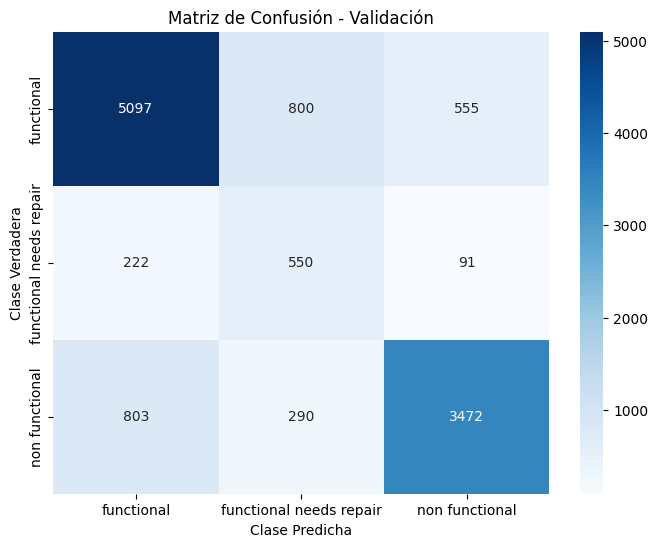

In [110]:
# --- ENTRENAMIENTO DEL MODELO ---

#Creamos instancia

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample',
    min_samples_split=10,
    min_samples_leaf=5
)

#Entrenamo el modelo con tus datos de entrenamiento (X_train, y_train)
rf_model.fit(X_train, y_train)
print("Modelo entrenado :D")



# Predicciones sobre el conjunto de validación (X_val)
y_pred_val = rf_model.predict(X_val)
print("Predicciones dobtr el conjunyo de validación realizadas.")

# Rendimeinto
print("\n--- Métricas de Evaluación en el Conjunto de Validación ---")

# Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy en Validación: {accuracy_val:.4f}")

# Reporte de Clasificación
print("\nReporte de Clasificación en Validación:")
print(classification_report(y_val, y_pred_val))

# Matriz de Confusión
print("\nMatriz de Confusión en Validación:")
cm = confusion_matrix(y_val, y_pred_val)
# Usar las clases aprendidas por el modelo para las etiquetas del heatmap
labels_for_heatmap = rf_model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_for_heatmap, yticklabels=labels_for_heatmap)
plt.title('Matriz de Confusión - Validación')
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()




--- Importancia de las Características (Top 20) ---
longitude                0.061047
latitude                 0.052628
quantity_group_dry       0.048003
quantity_dry             0.044608
day_of_year              0.035722
lga_freq                 0.032749
ward_freq                0.031002
gps_height               0.030415
edad_pozo                0.028828
construction_year        0.025090
day_recorded             0.024636
funder_freq              0.024130
installer_freq           0.022832
population               0.021683
district_code            0.020715
region_code              0.019803
scheme_name_freq         0.019688
week_day_recorded        0.016415
waterpoint_type_other    0.015213
amount_tsh               0.013953
dtype: float64


<ipython-input-108-ca541287fb51>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_features.values, y=top20_features.index, palette='viridis')


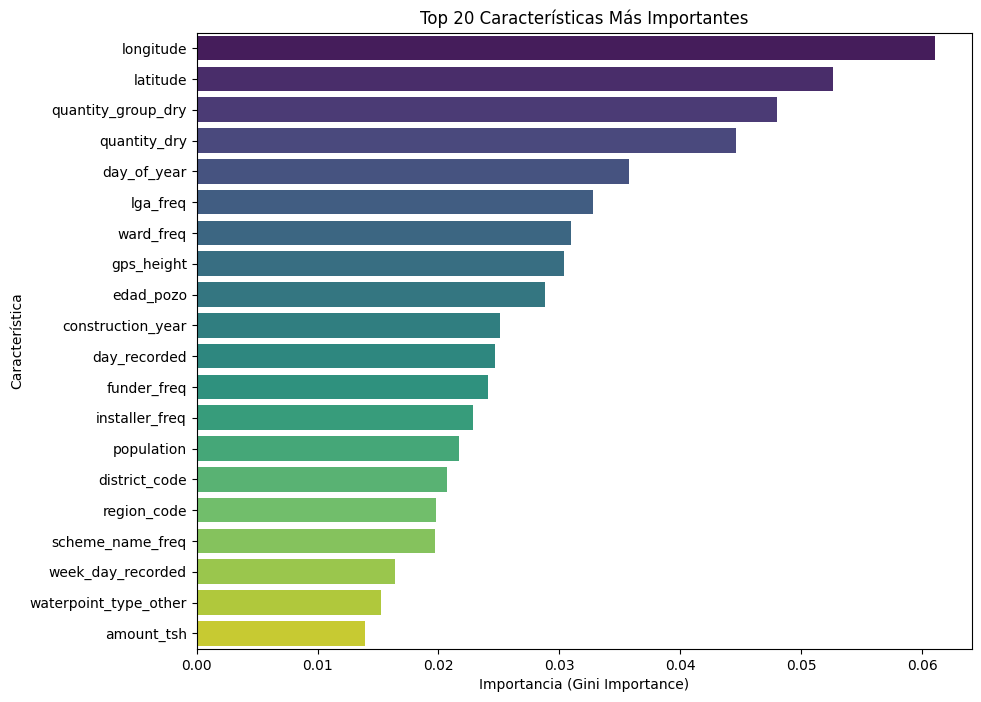

In [108]:
print("\n--- Importancia de las Características (Top 20) ---")
try:

    feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

    top20_features = feature_importances.nlargest(20)
    print(top20_features)


    plt.figure(figsize=(10, 8)) #fit
    sns.barplot(x=top20_features.values, y=top20_features.index, palette='viridis')
    plt.title('Top 20 Características Más Importantes')
    plt.xlabel('Importancia (Gini Importance)')
    plt.ylabel('Característica')

    plt.show()
except Exception as e:
    print(f"No se pudo generar la importancia de características: {e}")